In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os

sys.path.append(os.path.join('..'))

from counting_boats.utils import area_coverage

In [20]:
%cd C:\\ML_Software\\results
coverage = pd.read_csv('coverage.csv')

reference_gon = "C:\\ML_Software\\data\\polygons\\moreton.geojson"

def date_2_udm(date):
    y, m, d = date.split('-')
    fsdate = f"{y}{m}{d}"
    udm = [f for f in os.listdir("UDM") if fsdate in f][0]
    return os.path.join("UDM", udm)

# print(coverage.head())
# coverage = coverage[coverage['date'] == '2016-04-08']
# print(coverage)

# for i in range(0, len(coverage)):
#     row = coverage.iloc[i]
#     poly = row['polygon']
#     coverage_n = area_coverage.area_coverage_poly(reference=reference_gon, polygon=poly)
#     # put the coverage in the coverage column
#     udm = date_2_udm(row["date"])
#     cloud_cover, _ = area_coverage.cloud_coverage_udm(udm)
#     coverage.iloc[i, coverage.columns.get_loc('area_coverage')] = coverage_n
#     coverage.iloc[i, coverage.columns.get_loc('cloud_coverage')] = cloud_cover
#     print(row["date"], coverage_n, cloud_cover)

# save the coverage csv again
# coverage.to_csv('coverage.csv', index=False)


C:\ML_Software\results


[0.00142959 0.31925399 0.56270262 0.47600022 0.48433528 0.01924412
 0.39267307 0.01258789 0.24145389 0.09048829 0.3414904  0.4792332
 0.32507776 0.35457044]


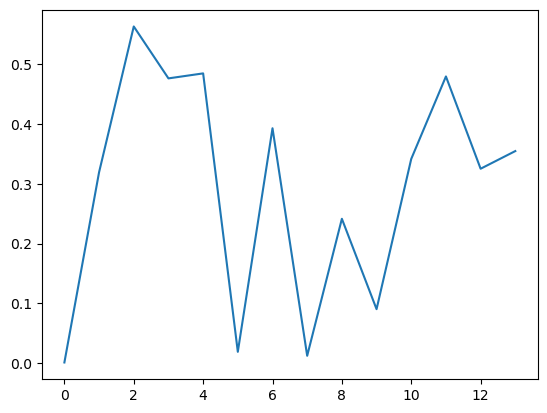

In [21]:
all_cov = coverage['area_coverage'].values
print(all_cov)
fig = plt.figure()  
plt.plot(all_cov)
plt.show()


        date  class                images   latitude   longitude  confidence  \
2 2016-08-04      0  20160804_moreton.tif -27.321350  153.086449    0.767843   
3 2016-08-04      0  20160804_moreton.tif -26.961795  153.230386    0.660916   
4 2016-08-04      0  20160804_moreton.tif -27.303482  153.167356    0.755073   
5 2016-08-04      0  20160804_moreton.tif -27.193013  153.101009    0.554271   
6 2016-08-04      0  20160804_moreton.tif -27.192851  153.099949    0.748274   

           w          h      aoi  
2  12.750005  10.999997  moreton  
3  10.000016  10.999997  moreton  
4   8.500003   9.333334  moreton  
5   8.000013   8.000013  moreton  
6   7.285711   8.000013  moreton  


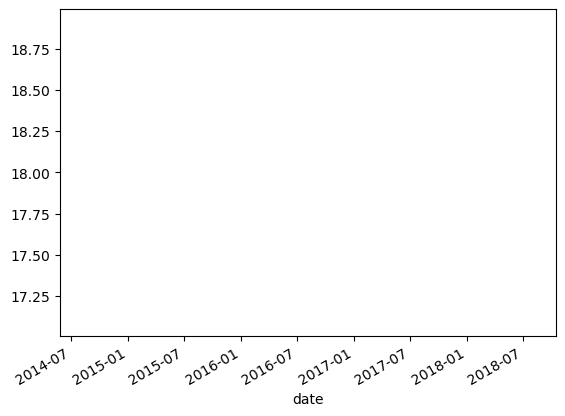

In [22]:
detections = pd.read_csv("C:\\ML_Software\\results\\boat_detections.csv")
detections["date"] = pd.to_datetime(detections["date"], dayfirst=True)
coverage = pd.read_csv("C:\\ML_Software\\results\\coverage.csv")
coverage["date"] = pd.to_datetime(coverage["date"])

over50 = detections[detections["date"].isin(coverage[coverage["area_coverage"] > 0.5]["date"])]
print(over50.head())

# plot count of rows per date
over50["date"].value_counts().sort_index().plot()
plt.show()

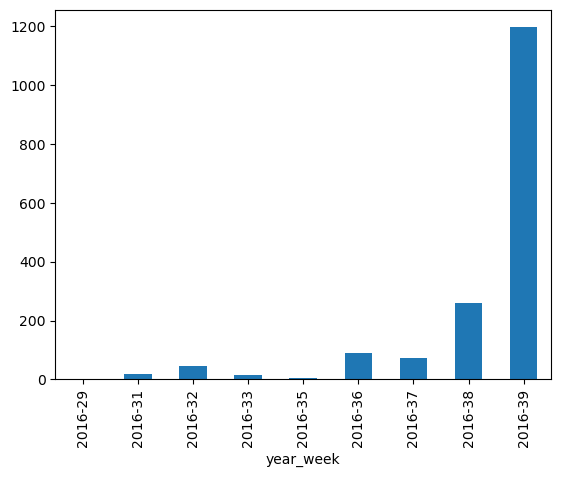

In [23]:
# bar chart of detections per week
detections["year_week"] = detections["date"].dt.strftime('%Y-%U')
detections["year_week"].value_counts().sort_index().plot(kind='bar')
plt.show()

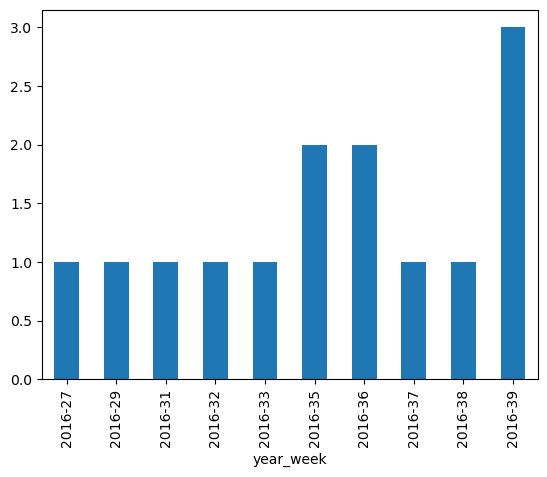

<Axes: xlabel='year_week'>

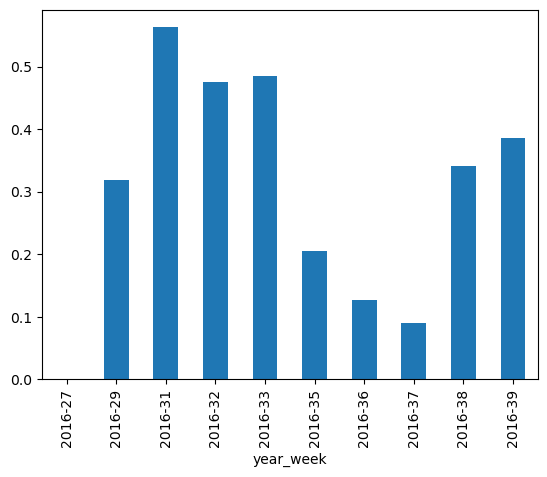

In [25]:
# bar chart of images per week
coverage["year_week"] = coverage["date"].dt.strftime('%Y-%U')
coverage["year_week"].value_counts().sort_index().plot(kind='bar')
plt.show()
# bar chart of coverage per week (e.g images scaled by coverage value)
coverage.groupby("year_week")["area_coverage"].mean().plot(kind='bar')